In [4]:
import numpy as np
import pandas as pd

df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                       )
print('Data read into a pandas dataframe!')
df_can.head()
# Xem 5 hàng dưới cùng
df_can.tail()

Data read into a pandas dataframe!


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [14]:
# xem thông tin cơ bản của dataframe
df_can.info(verbose=False)
# đọc tất cả các cột của dataframe
df_can.columns.values
# đọc các index 194 cột
df_can.index.values 
print(df_can.columns.tolist)
df_can.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB
<bound method IndexOpsMixin.tolist of Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')>


(195, 43)

In [21]:
# trong pandas axis=0 biểu diễn hàng (mặc định) và axis=1 biểu diễn cột.
# Loại bỏ cột không cần thiết, dùng drop

df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

KeyError: "['AREA', 'REG', 'DEV', 'Type', 'Coverage'] not found in axis"

In [26]:
# Đổi tên => rename()
df_can.rename(columns={'OdName':'Country', 'AreaName': 'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [121]:
df_can['Total'] = df_can[list(range(1980,2014))].sum(axis=1)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [45]:
# kiểm tra null => 
df_can.isnull()

df_can.describe()

df_can.head(3)
df_can.index.name = None 
df_can.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603


In [53]:

# print(df_can.iloc[87])

# print(df_can[df_can.index == 'Japan'].T.squeeze)      
df_can.reset_index()
# print(df_can.loc['Japan'])
print(df_can.loc['Japan', [1980, 1981]])

1980    701
1981    756
Name: Japan, dtype: object


In [58]:
condition = df_can['Continent']  == 'Asia'
print(condition)
df_can[condition]
df_can.shape

Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


(195, 37)

In [60]:
# Lọc theo điều kiện
df_can[(df_can['Continent'] == 'Asia') & (df_can['Region'] == 'Southern Asia')]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,1,5,10,7,36,865,1464,1879,1075,487
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,1,0,0,2,1,7,4,3,1,1
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,404,607,540,511,581,561,1392,1129,1185,1308
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394


# Matplotlib

In [64]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

print(mpl.__version_info__)
print(plt.style.available)

_VersionInfo(major=3, minor=9, micro=2, releaselevel='final', serial=0)
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


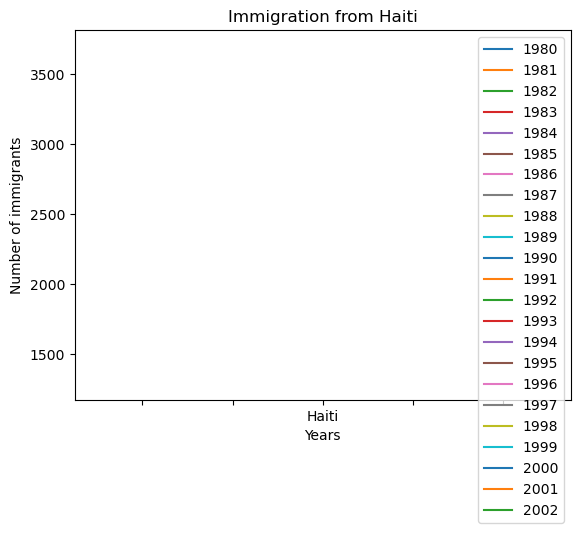

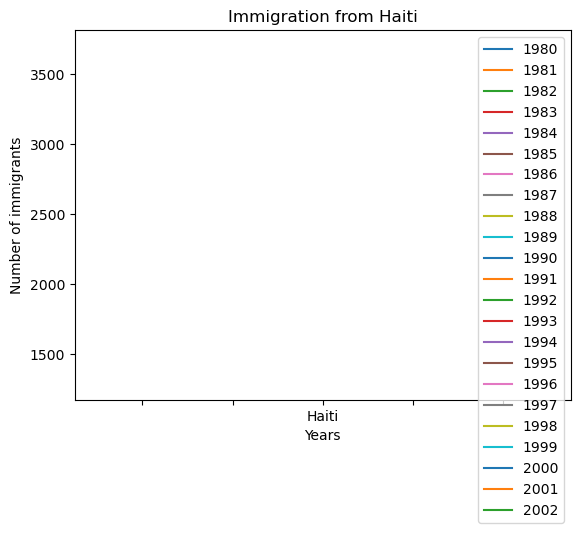

In [108]:

haiti = df_can.loc[['Haiti'], list(range(1980,2003))]
haiti.head()
haiti.plot(kind='line')
plt.title('Immigration from Haiti')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
#plt.text(2000, 6000, '2020 Earthquake')
plt.show()


In [115]:
df_CN_IN = df_can.loc[['India', 'China'], list(range(1980,2013))]
df_CN_IN.head()
df_CN_IN.plot(kind='line')

#plt.show()

<Axes: >

In [123]:
df_CN_IN = df_CN_IN.transpose()
df_CN_IN.plot(kind='line')
df_CN_IN.head()
#plt.show()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024


      India  China  United Kingdom of Great Britain and Northern Ireland  \
1980   8880   5123                                              22045      
1981   8670   6682                                              24796      
1982   8147   3308                                              20620      
1983   7338   1863                                              10015      
1984   5704   1527                                              10170      
1985   4211   1816                                               9564      
1986   7150   1960                                               9470      
1987  10189   2643                                              21337      
1988  11522   2758                                              27359      
1989  10343   4323                                              23795      
1990  12041   8076                                              31668      
1991  13734  14255                                              23380      
1992  13673 

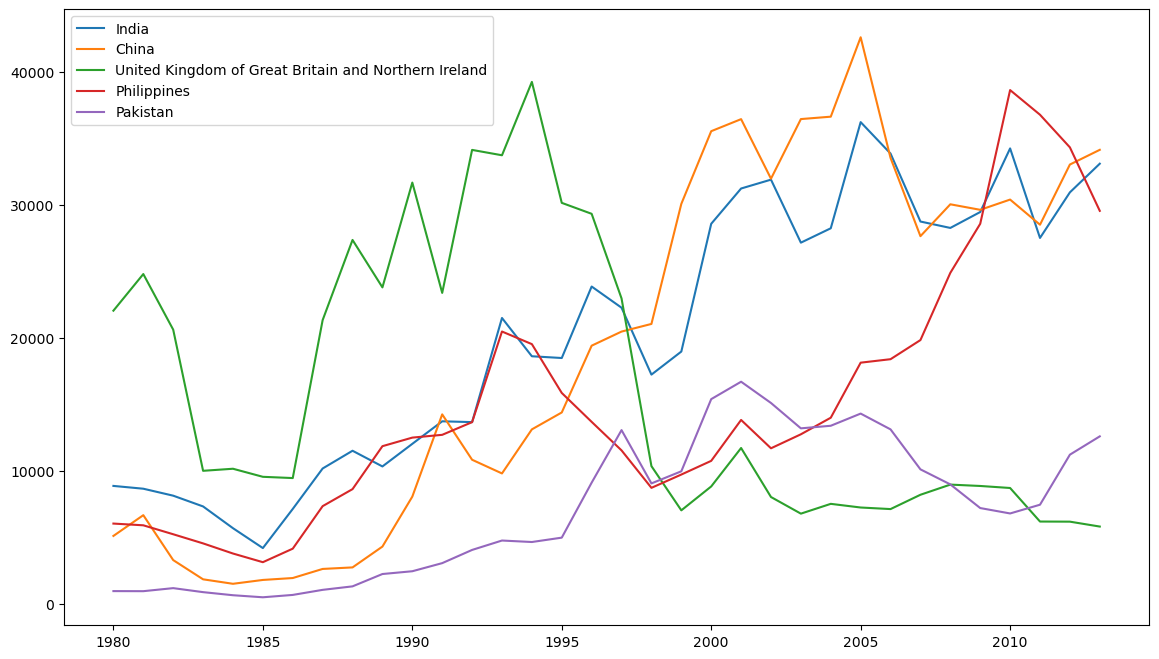

In [134]:
# Quiz
# 5 Quốc gia có nhiều người nhập cư vào Cannada nhất
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = df_can.head()

# Đảo ngược
df_top5 = df_top5[list(range(1980,2014))].transpose()
print(df_top5)
# Đổi chỉ mục 
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line', figsize=(14,8))


plt.show()
  